## Import Resources and Display Image

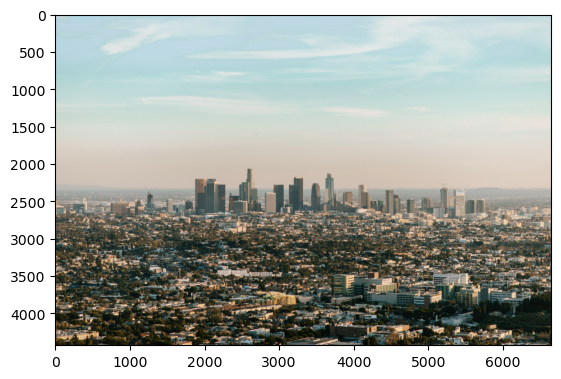

In [1]:
import numpy as np               # For working with arrays and kernels
import cv2                       # OpenCV for image processing
import matplotlib.pyplot as plt  # Displaying images
import matplotlib.image as mpimg # Load images using matplotlib

# Display plots inline
%matplotlib inline           

# Import the image
image = mpimg.imread('dtla.jpg')

# Display image
plt.imshow(image)

## Convert the Image to Grayscale

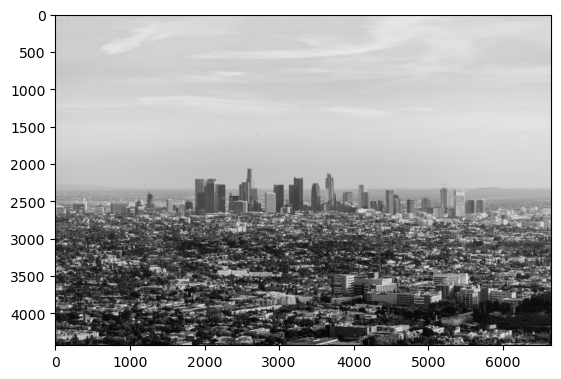

In [2]:
# Convert image from RGB to grayscale
grayscale_img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Display grayscale image
plt.imshow(grayscale_img, cmap='gray')

## Blurring the Image

<method-wrapper '__len__' of numpy.ndarray object at 0x177f8a8b0>


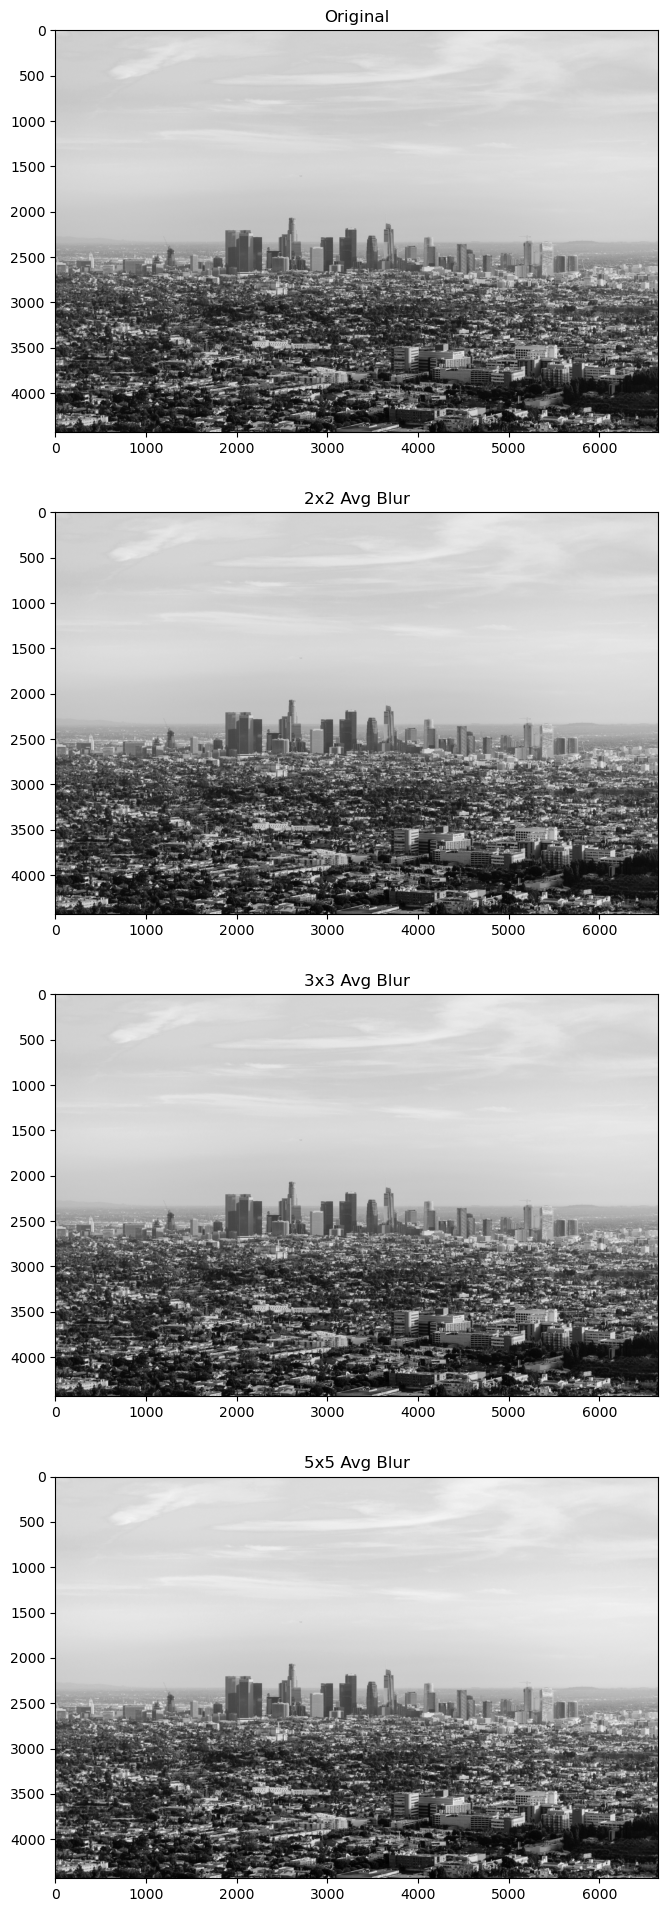

In [3]:
# Define custom kernels for blurring
# 2x2 kernel for avg blurring
S2x2 = np.array([
    [1,1],
    [1,1]
])

# 3x3 kernel for avg blurring
S3x3 = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
# 5x5 kernel for avg blurring
S5x5 = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
])

print(S3x3.__len__)

# Define plot size
fig = plt.figure(figsize=(48,24))

# Apply blur filter to grayscale image
blurred_S2x2= cv2.filter2D(grayscale_img,-1,S2x2/4.0)
blurred_S3x3= cv2.filter2D(grayscale_img,-1,S3x3/9.0)
blurred_S5x5= cv2.filter2D(grayscale_img,-1,S5x5/25.0)

# Plot original grayscale image
fig.add_subplot(4,1,1)
plt.imshow(grayscale_img,cmap='gray')
plt.title('Original')

# Plot 2x2 blurred image
fig.add_subplot(4,1,2)
plt.imshow(blurred_S2x2,cmap='gray')
plt.title('2x2 Avg Blur')

# Plot 3x3 blurred image
fig.add_subplot(4,1,3)
plt.imshow(blurred_S3x3,cmap='gray')
plt.title('3x3 Avg Blur')

# Plot 5x5 blurred image
fig.add_subplot(4,1,4)
plt.imshow(blurred_S5x5,cmap='gray')
plt.title('5x5 Avg Blur')

# Display original and blurred images
plt.show()

## Sobel Edge Detection

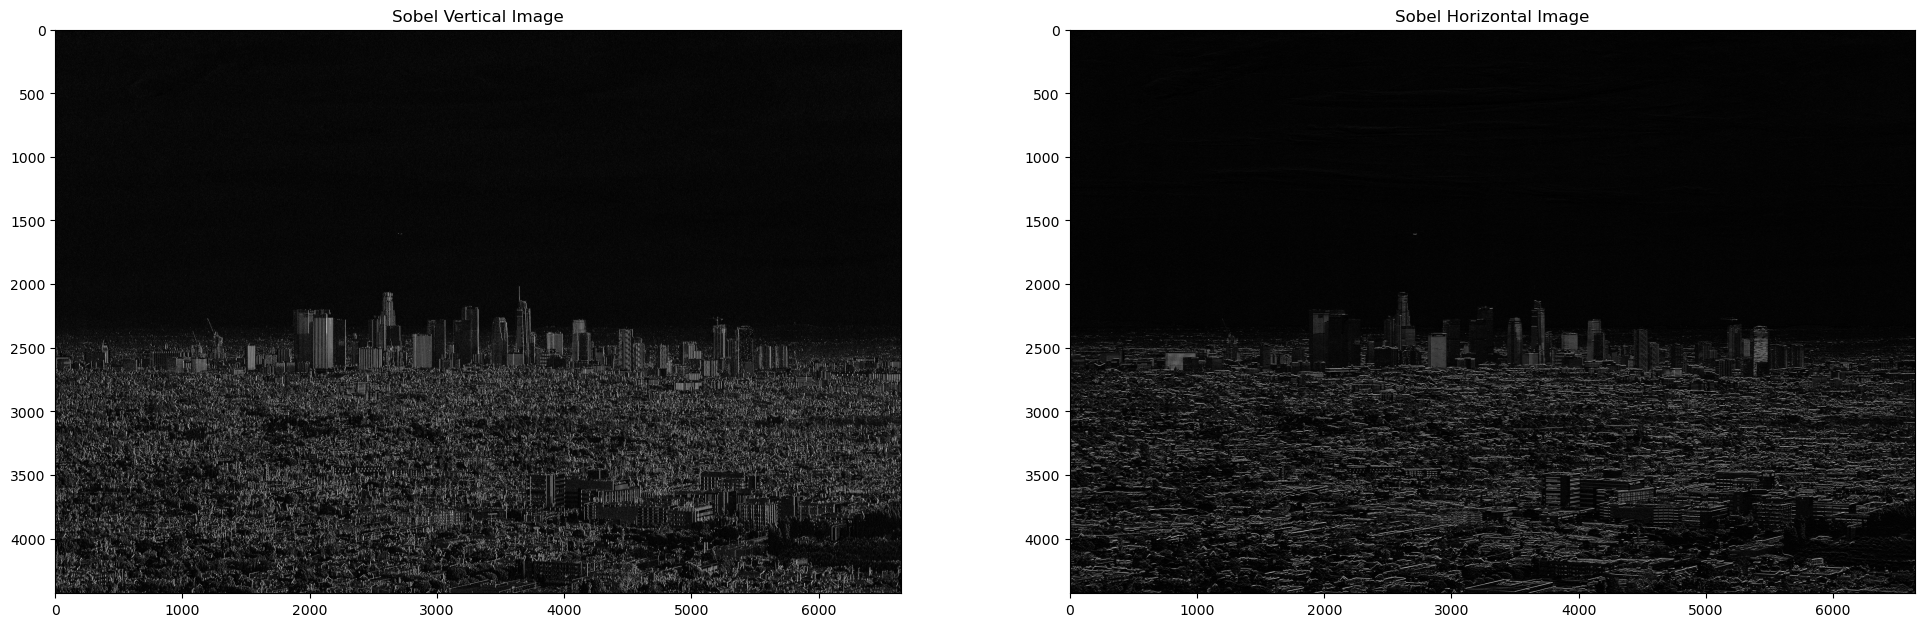

In [4]:
# Define sobel kernels for vertical and horizontal edge detection
sobel_vertical = np.array([
    [-1,0,1],
    [-5,0,5],
    [-1,0,1],
])

sobel_horizontal = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

# Apply vertical and horizontal edge detection filters to the grayscale image
sobel_vert_img = cv2.filter2D(grayscale_img, -1, sobel_vertical)
sobel_hor_img = cv2.filter2D(grayscale_img, -1, sobel_horizontal)

# Define the plot size
fig = plt.figure(figsize=(24,24))

# Plot the sobel vertical filtered image
fig.add_subplot(2,2,1)
plt.imshow(sobel_vert_img,cmap='gray')
plt.title('Sobel Vertical Image')

# Plot the sobel horizontal filtered image
fig.add_subplot(2,2,2)
plt.imshow(sobel_hor_img, cmap='gray')
plt.title('Sobel Horizontal Image')

# Display both filtered image
plt.show()

## Corner Detection

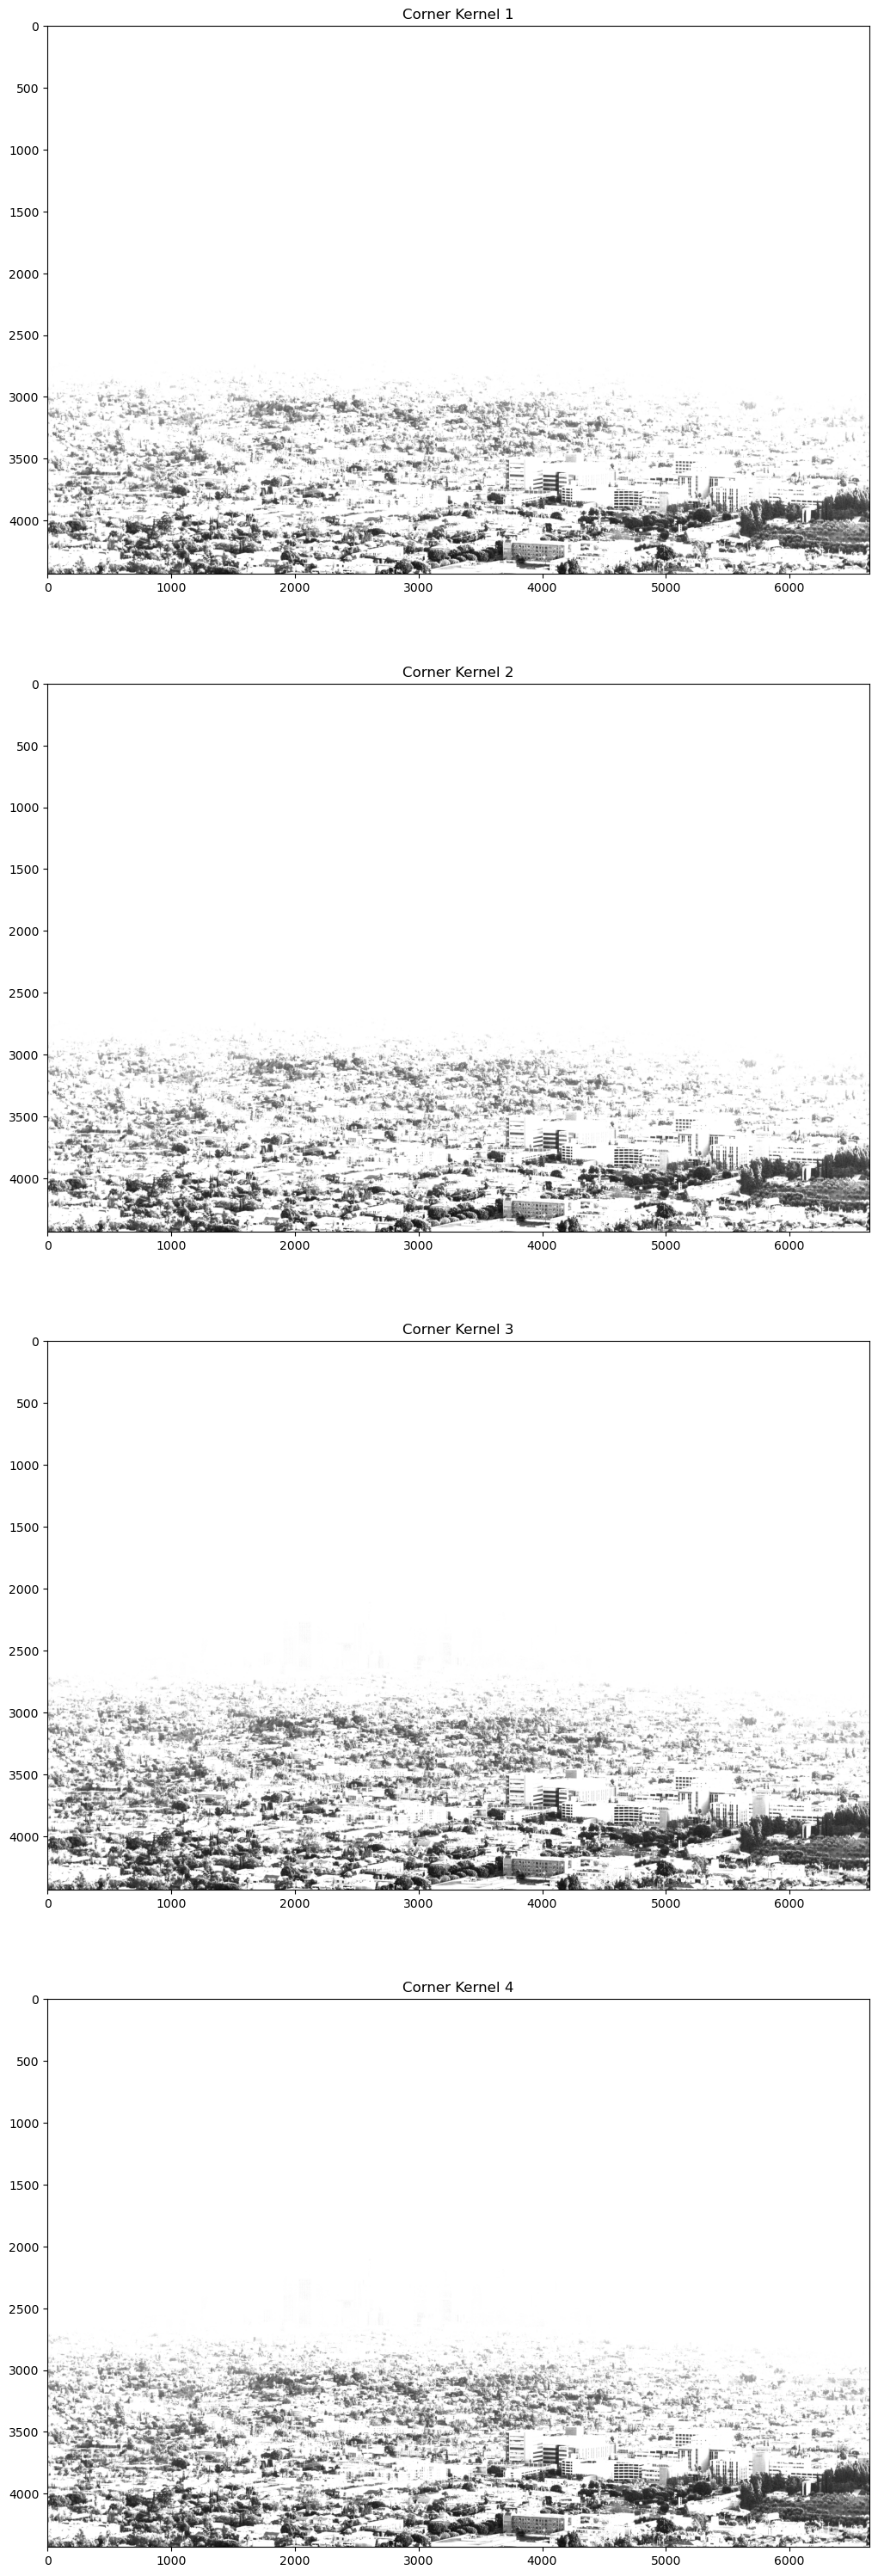

In [5]:
# Define the corner kernels
corner_kernels = [
    np.array([[1, 1, 0],
              [0, 1, 1],
              [0, 0, 1]]),

    np.array([[1, 1, 1],
              [1, 1, 0],
              [0, 0, 0]]),

    np.array([[0, 0, 0],
              [1, 1, 0],
              [1, 1, 0]]),

    np.array([[0, 0, 0],
              [0, 1, 1],
              [0, 1, 1]])
]

# definre plot size
fig = plt.figure(figsize=(24,48))

# Loop through each corner kernel and define the subplot
for i, kernel in enumerate(corner_kernels):
    filtered = cv2.filter2D(grayscale_img, -1, kernel)
    fig.add_subplot(5, 1, i + 1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Corner Kernel {i+1}')

plt.show()


## Blur and Edge Detection

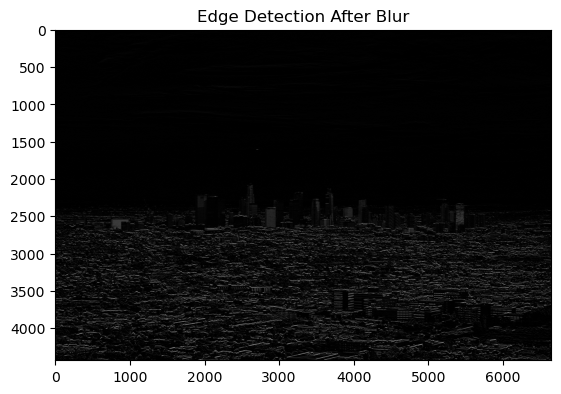

In [6]:
blurred = cv2.filter2D(grayscale_img,-1, S5x5/25.0)
edges_after_blur = cv2.filter2D(blurred,-1, sobel_horizontal)
plt.imshow(edges_after_blur, cmap='gray')
plt.title('Edge Detection After Blur')
plt.show()